## Wide and Deep Network Architectures

### Business Understanding

In light of recent global events, the burden and stress of pursuing higher education has been amplified. The COVID-19 pandemic has forced many students to adapt to online learning, which has been challenging for some. As a result, many students are at risk of dropping out of university due to the increased academic workload, lack of social interaction, and financial difficulties. In order to prevent students from dropping out, it is important to identify students who are at risk and provide them with the necessary support and resources to help them succeed.

The goal of this project is to build a predictive model that can identify students who are at risk of dropping out of university. By analyzing the academic performance and demographic information of students, we can predict whether a student will drop out, graduate, or continue to be enrolled in the university. This information can be used to provide early intervention to students who are at risk and help them succeed in their academic pursuits.

To accomplish this task, we selected this dataset that contains information about students who enrolled in a university program and their academic performance. The dataset includes features such as the number of curricular units enrolled, the grade average in the first and second semester, the previous qualification. Given the target consumer of our product are education institutions, the features in this dataset aren't just relevant to the problem we are trying to solve, but also easily obtainable by the client. This will make it easier for the client to provide the necessary data for the model to make predictions.

Dataset Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

### Preparation

In [80]:
import pandas as pd
df = pd.read_csv('data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Reading in the raw data, we can see that there are 7 features of type float64, 29 feature of type int64, and 1 feature of type object. We will need to convert the object feature into a numerical representation using one-hot encoding. We will also need to remove any features that are not useful for this project.

In [81]:
from sklearn.preprocessing import OneHotEncoder

df['Student_Status'] = df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}).fillna(-1)
#remove unwanted columns
drop_columns = ['Application mode', 'Application order','Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Age at enrollment']
df = df.drop(drop_columns, axis=1)
# Combine the last 3 features into a single 'Student_Status' column
df['Student_Status'] = df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}).fillna(-1)
df = df.drop('Target', axis=1)
# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Change these values to floats so they're counted with the other numerical values
df['Curricular units 1st sem (enrolled)'] = df['Curricular units 1st sem (enrolled)'].astype(float)
df['Curricular units 2nd sem (enrolled)'] = df['Curricular units 2nd sem (enrolled)'].astype(float)

attr_des = pd.DataFrame()
attr_des['Features'] = df.columns
# Description taken directly from dataset website https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
attr_des['Description'] = [ # Marital status
                            '1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated',
                           # Courses
                           '33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)',
                            # Daytime/evening attendance
                            '1 - daytime 0 - evening',
                            # Previous qualification
                            '1 - Secondary education 2 - Higher education - bachelors degree 3 - Higher education - degree 4 - Higher education - masters 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)',
                            # Previous qualification (grade)
                            'Grade of previous qualification (between 0 and 200)',
                            # Nacionality
                            '1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian',
                            # Mother's qualification
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            # Father's qualification
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            # Mother's occupation
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants',
                            # Father's occupation
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers',
                            # Admission grade
                            'Admission grade (between 0 and 200)',
                            # Displaced
                            '1 – yes 0 – no',
                            # Educational special needs
                            '1 – yes 0 – no',
                            # Debtor
                            '1 – yes 0 – no',
                            # Tuition fees up to date
                            '1 - yes 0 - no',
                            # Gender
                            '1 – male 0 – female',
                            # Scholarship holder
                            '1 – yes 0 – no',
                            # International
                            '1 – yes 0 – no',
                            # Curricular units 1st sem (enrolled)
                            'Number of curricular units enrolled in the 1st semester',
                            # Curricular units 1st sem (grade)
                            'Grade average in the 1st semester (between 0 and 20)',
                            # Curricular units 2nd sem (enrolled)
                            'Number of curricular units enrolled in the 2nd semester',
                            # Curricular units 2nd sem (grade)
                            'Grade average in the 2nd semester (between 0 and 20)',
                            # Unemployment rate
                            'Unemployment rate (%)',
                            # Inflation rate
                            'Inflation rate (%)',
                            # GDP
                            'GDP',
                            # Target (Student_Status)
                            '0 - Dropout 1 - Graduate 3 - Enrolled',
                            ]
attr_des['Type'] = ['Nominal','Nominal','Nominal','Nominal','Numeric','Nominal','Nominal','Nominal','Nominal','Nominal','Numeric','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal', 'Numeric', 'Numeric', 'Numeric','Numeric','Numeric','Numeric','Numeric', 'Nominal']
attr_des['Continous/Discrete'] = ['Discrete','Discrete','Discrete','Discrete','Continous','Discrete','Discrete','Discrete','Discrete','Discrete','Continous','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Continous','Continous','Continous','Continous','Continous','Continous','Continous','Discrete']


attr_des

,Features,Description,Type,Continous/Discrete
0,Marital status,1 – single 2 – married 3 – widower 4 – divorce...,Nominal,Discrete
1,Course,33 - Biofuel Production Technologies 171 - Ani...,Nominal,Discrete
2,Daytime/evening attendance\t,1 - daytime 0 - evening,Nominal,Discrete
3,Previous qualification,1 - Secondary education 2 - Higher education -...,Nominal,Discrete
4,Previous qualification (grade),Grade of previous qualification (between 0 and...,Numeric,Continous
5,Nacionality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,Nominal,Discrete
6,Mother's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
7,Father's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
8,Mother's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete
9,Father's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Course                               4424 non-null   int64  
 2   Daytime/evening attendance	          4424 non-null   int64  
 3   Previous qualification               4424 non-null   int64  
 4   Previous qualification (grade)       4424 non-null   float64
 5   Nacionality                          4424 non-null   int64  
 6   Mother's qualification               4424 non-null   int64  
 7   Father's qualification               4424 non-null   int64  
 8   Mother's occupation                  4424 non-null   int64  
 9   Father's occupation                  4424 non-null   int64  
 10  Admission grade                      4424 non-null   float64
 11  Displaced                     

After dropping all unwanted columns and one hot encoding the 'Student_Status' column, we are left with 26 features. Out the 26 features, there are 17 one-hot encoded features that's discrete and 9 features that are continuous. The next step we will take is to normalize the continuous features.

#### Scaling Numerical Features on our dataset.
First, we are selecting the continuous features from the dataset.


In [83]:
# Identify continuous features based on attribute descriptions
continuous_features = attr_des.loc[attr_des['Continous/Discrete'] == 'Continous', 'Features'].tolist()
print(f"Continuous Features: {continuous_features}")

Continuous Features: ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']


Then we are performing normalization with sklearn's preprocessing.normalize function. That does is scale each feature to have a unit norm. We can see that the continuous features are now normalized. Here is also where you are going to find the summary statistics for all the features in the dataset.

In [84]:
from sklearn import preprocessing
import numpy as np

df[continuous_features] = preprocessing.normalize(df[continuous_features])
df.info()
df.head()

# Select all numerical variables
numeric_columns = df.select_dtypes(float)


# Get summary statistics for numerical variables
summary_stats = numeric_columns.describe()
print(summary_stats)


# Categorical Variables Summary
df_temp = df.copy(deep=True)
df.info()


# Select all categorical variables
c = df_temp.select_dtypes(np.integer).columns


# Change all the ints to type of category
df_temp[c] = df_temp[c].astype('category')


# Get counts, unique values, 'top' value, and the frequency of each
cat_summary = df_temp.select_dtypes('category').describe()


print(cat_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Course                               4424 non-null   int64  
 2   Daytime/evening attendance	          4424 non-null   int64  
 3   Previous qualification               4424 non-null   int64  
 4   Previous qualification (grade)       4424 non-null   float64
 5   Nacionality                          4424 non-null   int64  
 6   Mother's qualification               4424 non-null   int64  
 7   Father's qualification               4424 non-null   int64  
 8   Mother's occupation                  4424 non-null   int64  
 9   Father's occupation                  4424 non-null   int64  
 10  Admission grade                      4424 non-null   float64
 11  Displaced                     

#### Identify Cross-Product Features
We will now identify the cross-product features that we will use in our wide and deep network. A quick search on google scholar yield some interesting results. We will use the following features for our wide and deep network.

##### Curricular Units Enrolled × Curricular Units Grade
The classic excuse of "I'm taking too many classes" is often used by students to explain their poor grades. This 2021 paper on the role of academic workload in the performance of university students found that the number of curricular units enrolled is negatively correlated with the grade average. We will use this cross-product feature to show the interaction between the number of curricular units enrolled and the grade average.

https://eric.ed.gov/?id=EJ1304834

Reference: Schmid, C., Neuböck, S., & Horn, K. (2021). The role of academic workload in the performance of university students. Journal of Education and Work.

In [85]:
df['Curricular_Units_Interaction'] = df['Curricular units 1st sem (enrolled)'] * df['Curricular units 1st sem (grade)']

##### Previous Qualification × Grade of Previous Qualification
A 2005 study on the relationship between academic performance and previous qualifications found that the type and grade of the previous qualification is a significant predictor of academic performance. We will use this cross-product feature to show the interaction between the previous qualification and the grade of the previous qualification.

https://pubmed.ncbi.nlm.nih.gov/14717633/

Reference: Kuncel, N. R., Hezlett, S. A., & Ones, D. S. (2005). Academic performance, career potential, creativity, and job performance: Can one construct predict them all?. Journal of Personality and Social Psychology.

In [86]:
df['Qualification_Grade_Interaction'] = df['Previous qualification'] * df['Previous qualification (grade)']

##### Curricular Units (1st Semester) Grade × Scholarship Holder
A 2003 study on the effect of student aid on college attendance and completion found that scholarship holders have higher academic performance compared to non-scholarship holders. We will use this cross-product feature to show the interaction between the grade in the first semester and the scholarship holder status.

https://www.aeaweb.org/articles?id=10.1257/000282803321455287

Reference: Dynarski, S. (2003). Does aid matter? Measuring the effect of student aid on college attendance and completion. American Economic Review.



In [87]:
df['Scholarship_Performance_Interaction'] = df['Curricular units 1st sem (grade)'] * df['Scholarship holder']


##### GDP × Unemployment Rate
A 2012 study on the short- and long-term career effects of graduating in a recession found that macroeconomic factors like GDP and unemployment rates can jointly influence student decisions to enroll, persist, or drop out. We will use this cross-product feature to show the interaction between the GDP and the unemployment rate.

https://www.researchgate.net/publication/227349860_The_Short-_and_Long-Term_Career_Effects_of_Graduating_in_a_Recession

Reference: Oreopoulos, Philip, Till von Wachter, and Andrew Heisz. 2012. "The Short- and Long-Term Career Effects of Graduating in a Recession." American Economic Journal: Applied Economics, 4 (1): 1–29. DOI: 10.1257/app.4.1.1

In [88]:
df['Economic_Interaction'] = df['GDP'] * df['Unemployment rate']

To conclude, we added these 4 new cross product features to our dataset to be used in our wide and deep network. These features are the interaction between the number of curricular units enrolled and the grade average, the previous qualification and the grade of the previous qualification, the grade in the first semester and the scholarship holder status, and the GDP and the unemployment rate. This will put our dataset at 30 features.

In [89]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Course                               4424 non-null   int64  
 2   Daytime/evening attendance	          4424 non-null   int64  
 3   Previous qualification               4424 non-null   int64  
 4   Previous qualification (grade)       4424 non-null   float64
 5   Nacionality                          4424 non-null   int64  
 6   Mother's qualification               4424 non-null   int64  
 7   Father's qualification               4424 non-null   int64  
 8   Mother's occupation                  4424 non-null   int64  
 9   Father's occupation                  4424 non-null   int64  
 10  Admission grade                      4424 non-null   float64
 11  Displaced                     

,Marital status,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Student_Status,Curricular_Units_Interaction,Qualification_Grade_Interaction,Scholarship_Performance_Interaction,Economic_Interaction
0,1,171,1,1,0.690568,1,19,12,5,9,...,0.000000,0.000000,0.061132,0.007925,0.009849,0,0.000000,0.690568,0.0,0.000602
1,1,9254,1,1,0.741544,1,1,3,3,3,...,0.027808,0.063340,0.064422,-0.001390,0.003661,1,0.001804,0.741544,0.0,0.000236
2,1,9070,1,1,0.696828,1,37,37,9,9,...,0.034270,0.000000,0.061686,0.007996,0.009938,0,0.000000,0.696828,0.0,0.000613
3,1,9773,1,1,0.707999,1,38,37,5,3,...,0.034820,0.071961,0.054551,-0.004643,-0.018106,1,0.002713,0.707999,0.0,-0.000988
4,2,8014,0,1,0.571575,1,37,38,9,9,...,0.034295,0.074305,0.079449,-0.001715,0.004515,1,0.002418,0.571575,0.0,0.000359


#### Evaluation Metrics and Acceptence Criteria


Given the business implications of our model is to predict student dropout and provide early intervention, we will need to evaluate our model based on its ability to spot students who are at risk of dropping out. To evaluate our model, the only metric that matters is the recall score. We want to minimize the number of false negatives (students who are at risk of dropping out but are not identified to be at risk) as much as possible. We can tolerate a higher number of false positives (students who are not at risk of dropping out but are identified to be at risk) as long as we are able to identify all students who are at risk of dropping out. This is because we can provide early intervention to students who are falsely identified as at risk, but we cannot help students who are not identified as at risk. Therefore, the recall score will be the most important metric for evaluating our model. We will aim for a recall score of at least 0.75 to ensure that we are able to identify at least 75% of students who are at risk of dropping out. This also means that for status of "Graduate" and "Enrolled", we will aim for a recall score of 0.75 or higher just to make the metrics easier to evaluate. In the event of a recall score is below 0.75, we can isolate just the dropout status and do a dropout recall score only acceptance criteria for the model.

C:\Users\melan\AppData\Local\Temp\ipykernel_18856\4179391121.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


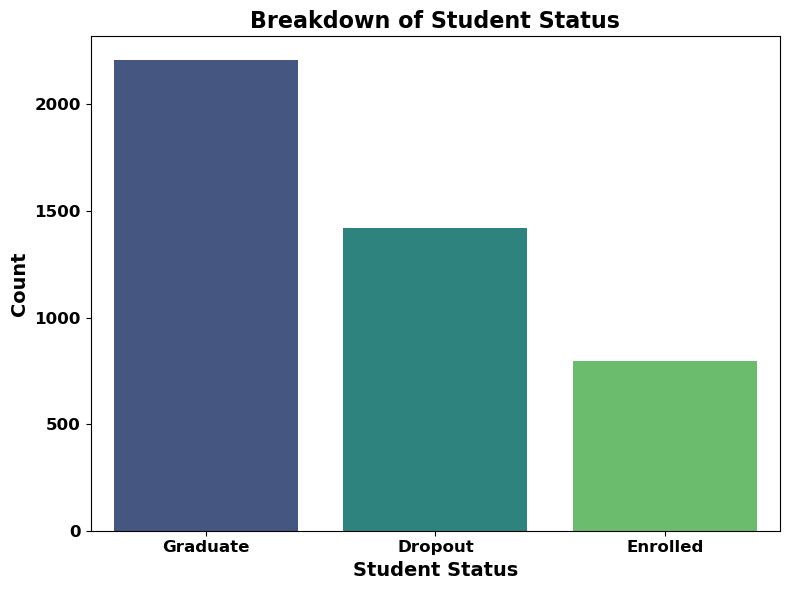

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for each status
status_counts = df['Student_Status'].value_counts()

# Define the labels for the statuses
status_labels = {
    0: "Dropout",
    1: "Graduate",
    2: "Enrolled"
}

# Map numeric values to descriptive labels
status_counts.index = status_counts.index.map(status_labels)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")
plt.title("Breakdown of Student Status", fontsize=16)
plt.xlabel("Student Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


#### Training and Testing Split

Please take a look at the breakdown of student status from above. We can see that the dataset is imbalanced with the majority of students being "Graduate", followed by "Dropout", and then "Enrolled". The best strategy for splitting the dataset would be Stratified 10-Fold Cross-Validation. This will ensure that each fold has the same distribution of student statuses as the original dataset, assuming that the dataset is large enough which this one is. This way, we can preserve the class distribution and eliminate the chance of either over- or under-represented status. Although Shuffle Split with Stratification could also work, we will use Stratified 10-Fold Cross-Validation as it is more robust and reliable.

Plus in a market setting, the most optimal training dataset should be provided by the client. School records are much cheaper to obtained given most academic institution naturally keeps records. Thus, the affordability of obtaining a large dataset is not a problem. So we can assume that the dataset is large enough to use Stratified 10-Fold Cross-Validation.

In [91]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score

def evaluate_model_with_plot(model, X, y, skf):
    # Initialize lists to store the recall scores for each fold
    recall_scores = []
    fold = 1

    # Loop through each fold
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(X_test)

        # Calculate the recall score for this fold
        recall = recall_score(y_test, y_pred, average='weighted')
        recall_scores.append(recall)

        print(f"Fold {fold} Recall: {recall:.4f}")
        fold += 1

    # Plot the recall scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(recall_scores) + 1), recall_scores, marker='o', label='Recall per fold')
    plt.axhline(np.mean(recall_scores), color='r', linestyle='--', label='Average Recall')
    plt.title('Recall Scores Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('Recall (Weighted)')
    plt.xticks(range(1, len(recall_scores) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the average recall score across all folds
    return np.mean(recall_scores)


For testing purpose, I have also created a function just do the stratified splits. This function will return the indices for each fold. This will be useful for the training and testing split. X is the Feature matrix, y is Target variable. Returns a list of (train_index, test_index) tuples for each fold. So if you want the first fold, just splits[0].

In [92]:
from sklearn.model_selection import StratifiedKFold

def stratified_split(X, y, n_splits=10, shuffle=True, random_state=None):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    splits = []

    for train_index, test_index in skf.split(X, y):
        split_data = {
            "X_train": X.iloc[train_index],
            "X_test": X.iloc[test_index],
            "y_train": y.iloc[train_index],
            "y_test": y.iloc[test_index],
        }
        splits.append(split_data)

    print(f"Performed Stratified Split into {n_splits} folds.")
    return splits

In [93]:
# Example split
X = df.drop('Student_Status', axis=1)
y = df['Student_Status']


splits = stratified_split(X, y, n_splits=10, random_state=42)
for i, fold in enumerate(splits, start=1):  # Use 'fold' instead of overwriting 'splits'
    print(f"Fold {i}: Train size {fold['X_train'].shape}, Test size {fold['X_test'].shape}")

Performed Stratified Split into 10 folds.
Fold 1: Train size (3981, 29), Test size (443, 29)
Fold 2: Train size (3981, 29), Test size (443, 29)
Fold 3: Train size (3981, 29), Test size (443, 29)
Fold 4: Train size (3981, 29), Test size (443, 29)
Fold 5: Train size (3982, 29), Test size (442, 29)
Fold 6: Train size (3982, 29), Test size (442, 29)
Fold 7: Train size (3982, 29), Test size (442, 29)
Fold 8: Train size (3982, 29), Test size (442, 29)
Fold 9: Train size (3982, 29), Test size (442, 29)
Fold 10: Train size (3982, 29), Test size (442, 29)


Wide and Deep Network #1

In [94]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Assume 'df' is your dataframe and 'target_column' is the column to predict
X = df.drop('Student_Status', axis=1)
y = df['Student_Status']
#df_train = pd.concat([X_train, y_train], axis=1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Set up Stratified K-Fold
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    print(f"Fold {fold + 1}")


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [95]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

def create_model_1(input_dim, num_classes):
    # Wide part
    wide_input = Input(shape=(input_dim,))
    wide_output = Dense(10, activation='relu')(wide_input)

    # Deep part
    deep_input = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(deep_input)
    x = Dense(32, activation='relu')(x)
    deep_output = Dense(10, activation='relu')(x)

    # Combine wide and deep parts
    combined = concatenate([wide_output, deep_output])
    final_output = Dense(num_classes, activation='softmax')(combined)

    # Model
    model = Model(inputs=[wide_input, deep_input], outputs=final_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [96]:
from tensorflow.keras.layers import Embedding, Flatten

def create_model_2(input_dim, num_features, num_classes):
    # Wide part
    wide_input = Input(shape=(input_dim,))
    wide_output = Dense(num_features, activation='relu')(wide_input)

    # Deep part
    deep_input = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(deep_input)
    x = Dense(32, activation='relu')(x)
    deep_output = Dense(num_features, activation='relu')(x)

    # Combine wide and deep parts
    combined = concatenate([wide_output, deep_output])
    final_output = Dense(num_classes, activation='softmax')(combined)

    # Model
    model = Model(inputs=[wide_input, deep_input], outputs=final_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [100]:
from tensorflow.keras.layers import Add

def create_model_3(input_dim, num_classes):
    # Wide part
    wide_input = Input(shape=(input_dim,))
    wide_output = Dense(10, activation='relu')(wide_input)

    # Deep part with residual connections
    deep_input = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(deep_input)
    res = Dense(64, activation='relu')(x)
    x = Add()([x, res])  # Residual connection
    x = Dense(32, activation='relu')(x)
    deep_output = Dense(10, activation='relu')(x)

    # Combine wide and deep parts
    combined = concatenate([wide_output, deep_output])
    final_output = Dense(num_classes, activation='softmax')(combined)

    # Model
    model = Model(inputs=[wide_input, deep_input], outputs=final_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [101]:
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold + 1}")

    # Split data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    num_classes = len(np.unique(y_train))

    # Model 1: Simple Wide and Deep
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    # Model 1: Simple Wide and Deep
    model_1 = create_model_1(input_dim=X.shape[1], num_classes=num_classes)
    model_1.fit([X_train, X_train], y_train, epochs=10, batch_size=32, verbose=1)
    model_1.evaluate([X_test, X_test], y_test, verbose=1)

    # Repeat for models 2 and 3
    model_2 = create_model_2(input_dim=X.shape[1], num_features=X.shape[1], num_classes=num_classes)
    model_2.fit([X_train, X_train], y_train, epochs=10, batch_size=32, verbose=1)
    model_2.evaluate([X_test, X_test], y_test, verbose=1)

    model_3 = create_model_3(input_dim=X.shape[1], num_classes=num_classes)
    model_3.fit([X_train, X_train], y_train, epochs=10, batch_size=32, verbose=1)
    model_3.evaluate([X_test, X_test], y_test, verbose=1)


Fold 1
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3393 - loss: 1.2567
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6824 - loss: 0.7764
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7050 - loss: 0.7188
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7041 - loss: 0.6985
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7177 - loss: 0.6905
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7375 - loss: 0.6596
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.7399 - loss: 0.6420
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7448 - loss: 0.6433
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7340 - loss: 0.6374
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7513 - loss: 0.6217
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7072 - loss: 0.7112  
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - a